# **Practical assigment for Topic 6**

Our imports.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import mean_absolute_error, mean_squared_error, root_mean_squared_error, r2_score

Our dataset.

In [3]:
np.random.seed(42)
n = 100
X = 6 * np.random.rand(n, 1) - 3
y = 0.5 * X ** 2 + X + 2 + np.random.randn(n, 1)

Create KNN model.

In [ ]:
knn = KNeighborsRegressor(n_neighbors=10)
#knn = KNeighborsRegressor(n_neighbors=1, weights='distance')
knn.fit(X, y)

KNeighborsRegressor(n_neighbors=10)

Plot the model.

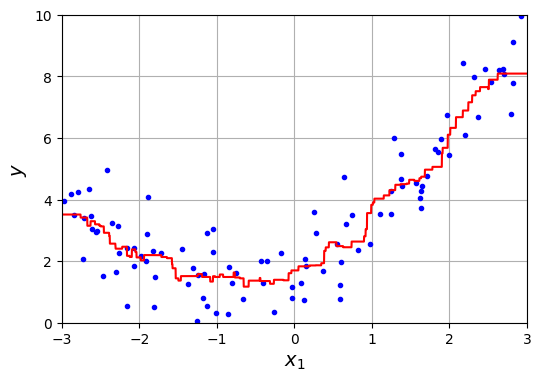

In [ ]:
X_plot = np.linspace(-3, 3, 5000).reshape(5000, 1)
yHat = knn.predict(X_plot)

plt.figure(figsize=(6, 4))
plt.plot(X, y, "b.")
plt.plot(X_plot, yHat, "r-")
plt.xlabel("$x_1$", fontsize=14)
plt.ylabel("$y$", fontsize=14)
plt.axis([-3, 3, 0, 10])
plt.grid()
plt.show()

Evaluate the model using Cross-Validation.

In [ ]:
yHat = cross_val_predict(knn, X, y, cv=10)

print('MAE: ', mean_absolute_error(y, yHat))
print('MSE: ', mean_squared_error(y, yHat))
print('RMSE:', root_mean_squared_error(y, yHat))
print('R2:  ', r2_score(y, yHat))

MAE:  0.7811714259928344
MSE:  0.98228031311966
RMSE: 0.9911005565126376
R2:   0.8135860851695909


## **Task 1**

Create your own implementation of KNN which should output the same predictions for any k as the one implemented in scikit-learn library. Implement both, distance-weighted and unweighted KNN. The function should work correctly for any number of features, training set sizes, and query list set sizes.

*In the code of `predict()` you are allowed to use only the **numpy** library, i.e., you are **not allowed** to use **scikit-learn**.*

*You are **not allowed** to modify any given code in this class. You may only add additional code to the `predict()` function.*

In [43]:
from sklearn.base import BaseEstimator

class KNN(BaseEstimator):

    def __init__(self, k=10, weighted=False):
        self.k = k
        self.weighted = weighted

    def fit(self, X, y):
        self.X = X
        self.y = y

    def predict(self, Xq):

        n = len(Xq)
        yHat = np.zeros(n)

        for q in range(n):
            xquery = Xq[q, :]
            D = np.sqrt(np.sum((self.X - xquery) ** 2, axis=1))

            NN = np.argsort(D)[:self.k]
            val = self.y[NN]

            if self.weighted:

                weights = 1 / (D[NN])
                yHat[q] = np.sum(weights * val) / np.sum(weights)

            else:
                yHat[q] = np.mean(val)

        return yHat

Create a KNN model using the newly implemented class.

In [48]:
my_knn = KNN(k=10)
#my_knn = KNN(k=1, weighted=True)
my_knn.fit(X, y)

Plot it.

*Note that the plot should be exactly the same as that what you got when you used the scikit-learn function `KNeighborsRegressor`. Compare the plots and, if they are not the same, correct your code.*

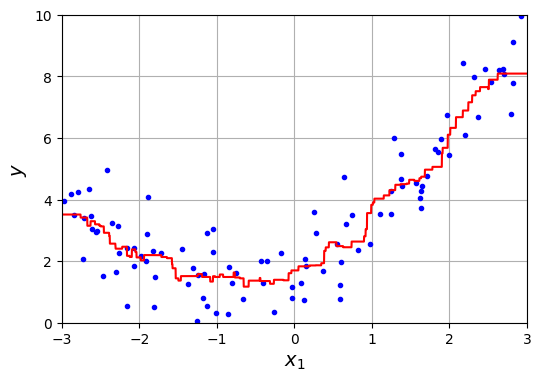

In [49]:
X_plot = np.linspace(-3, 3, 5000).reshape(5000, 1)
yHat = my_knn.predict(X_plot)

plt.figure(figsize=(6, 4))
plt.plot(X, y, "b.")
plt.plot(X_plot, yHat, "r-")
plt.xlabel("$x_1$", fontsize=14)
plt.ylabel("$y$", fontsize=14)
plt.axis([-3, 3, 0, 10])
plt.grid()
plt.show()

Evaluate it.

*Note that the evaluation result should be exactly the same as that what you got when you used the scikit-learn function `KNeighborsRegressor`. Compare the results and, if they are not the same, correct your code.*

In [36]:
yHat = cross_val_predict(my_knn, X, y, cv=10)

print('MAE: ', mean_absolute_error(y, yHat))
print('MSE: ', mean_squared_error(y, yHat))
print('RMSE:', root_mean_squared_error(y, yHat))
print('R2:  ', r2_score(y, yHat))

MAE:  0.7811714259928344
MSE:  0.98228031311966
RMSE: 0.9911005565126376
R2:   0.8135860851695909


## **Task 2**

Use the `KNeighborsRegressor` class to try KNN with k values from 1 to 20. Compute and print training MSE and cross-validated MSE values for each k. Cross-validation should be done using `cross_val_predict()`. Draw a plot with two curves analogous to the plot shown in **slide 16 on the right** from today's lecture. Add a legend so that it is clear which curve is which.

In [41]:
train_mse_list = []
crossval_mse_list = []
k_values = range(1, 21)
for k in k_values:

    knn_regressor = KNeighborsRegressor(n_neighbors=k)
    knn_regressor.fit(X, y)
    train = knn_regressor.predict(X)
    train_mse = mean_squared_error(y, train)
    yHat = cross_val_predict(knn_regressor, X, y, cv=5)
    crossval_mse = mean_squared_error(y, yHat)
    train_mse_list.append(train_mse)
    crossval_mse_list.append(crossval_mse)

    print(f"k={k}:\nTraining MSE={train_mse:.4f}\tCross-validated MSE={crossval_mse:.4f}")

k=1:
Training MSE=0.0000	Cross-validated MSE=1.5139
k=2:
Training MSE=0.3635	Cross-validated MSE=1.2667
k=3:
Training MSE=0.5278	Cross-validated MSE=1.1669
k=4:
Training MSE=0.6058	Cross-validated MSE=1.1463
k=5:
Training MSE=0.6671	Cross-validated MSE=1.1272
k=6:
Training MSE=0.7060	Cross-validated MSE=1.1027
k=7:
Training MSE=0.7161	Cross-validated MSE=1.0830
k=8:
Training MSE=0.7324	Cross-validated MSE=1.0319
k=9:
Training MSE=0.7883	Cross-validated MSE=1.0132
k=10:
Training MSE=0.7829	Cross-validated MSE=1.0104
k=11:
Training MSE=0.7998	Cross-validated MSE=0.9876
k=12:
Training MSE=0.8050	Cross-validated MSE=0.9825
k=13:
Training MSE=0.8073	Cross-validated MSE=0.9767
k=14:
Training MSE=0.7987	Cross-validated MSE=0.9654
k=15:
Training MSE=0.7988	Cross-validated MSE=0.9858
k=16:
Training MSE=0.8045	Cross-validated MSE=1.0289
k=17:
Training MSE=0.8286	Cross-validated MSE=1.1246
k=18:
Training MSE=0.8315	Cross-validated MSE=1.1993
k=19:
Training MSE=0.8719	Cross-validated MSE=1.2209
k=

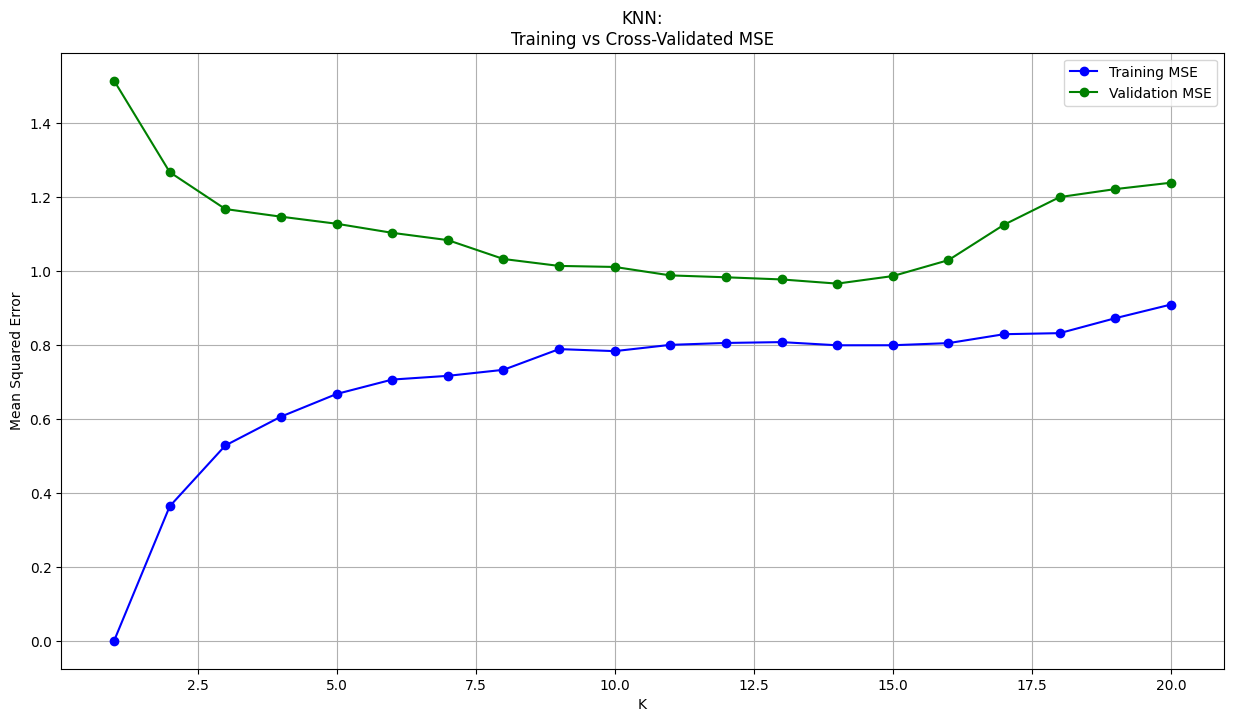

In [40]:
plt.figure(figsize=(15, 8))
plt.plot(k_values, train_mse_list, label='Training MSE', marker='o', color='blue')
plt.plot(k_values, crossval_mse_list, label='Validation MSE', marker='o', color='green')

plt.xlabel('K')
plt.ylabel('Mean Squared Error')
plt.title('KNN:\nTraining vs Cross-Validated MSE')
plt.legend()
plt.grid(True)
plt.show()


## **Task 3**
Explain the plot from Task 2. What exactly do we see in it and what conclusions can we make from it?

In [42]:
#ANSWER

**F**rom the Plot Training MSE vs Validation MSE for KNN, It is observable that the Mean Squared Error for the Training MSE increses as per the increase in K Values whereas Validation MSE has a decrease for the same.

In this plot, The best suited K Value is the one with Best Training MSE and Validation MSE (Validation MSE should be small).It is clear fom the chart that the from the 20 samples we took, K Value best suited for the purpose is **K = 14.**


---


*K = 13 is a good choice too, but K = 14 is the best suitable for prediction.*

---
**After the tasks are done, submit this file. Do not clear it's output - all print-outs and diagrams should be left in the file.**